# Problem 1- Adventure Works

## Challege 1: Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from datetime import datetime, date

%matplotlib inline

In [2]:
AW_data = pd.read_csv('AdvWorksCusts.csv')
AW_avemonth = pd.read_csv('AW_AveMonthSpend.csv')
AW_bikebuyer = pd.read_csv('AW_BikeBuyer.csv')
AW_data['AveMonthSpend'] = AW_avemonth['AveMonthSpend']
AW_data['BikeBuyer'] = AW_bikebuyer['BikeBuyer']
AW_test = pd.read_csv('AW_test.csv')
AW_data.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [3]:
AW_data.shape

(16519, 25)

The data set has 16519 rows and 25 columns

In [4]:
AW_data.columns

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')

In [5]:
AW_data.isnull().sum()

CustomerID                  0
Title                   16431
FirstName                   0
MiddleName               6985
LastName                    0
Suffix                  16517
AddressLine1                0
AddressLine2            16243
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
AveMonthSpend               0
BikeBuyer                   0
dtype: int64

The following columns:
(Title, Middle Name, Suffix and Address Line 2)
have a large number of data entries missing.
We shall hence omit these columns from our data.


In [6]:
AW_data.drop(['Title','MiddleName', 'Suffix', 'AddressLine2'], axis = 1, inplace = True)
AW_data.head()

,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,...,Professional,F,S,1,4,5,5,92771,95,1


In [7]:
print("No of total entries are %d" %(AW_data.CustomerID.count()))
print("No of unique entries are %d" %(AW_data.CustomerID.unique().shape[0]))
NoduplicateIDs= AW_data.CustomerID.count()-AW_data.CustomerID.unique().shape[0]
print(NoduplicateIDs)

No of total entries are 16519
No of unique entries are 16404
115


There are a total of 115 duplicate entries. We shall keep only their last occurrences

In [11]:
AW_data.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print("No of total entries are %d" %(AW_data.CustomerID.count()))
print("No of unique entries are %d" %(AW_data.CustomerID.unique().shape[0]))
NoduplicateIDs= AW_data.CustomerID.count()-AW_data.CustomerID.unique().shape[0]
print(NoduplicateIDs)

No of total entries are 16404
No of unique entries are 16404
0


Now, the data set is cleared of all duplicate entries.

In [77]:
AW_data.dtypes

CustomerID               int64
FirstName               object
LastName                object
AddressLine1            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
Age                      int64
dtype: object

In [10]:
AW_data.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397,72.391002,0.332541
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493,27.269921,0.471138
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000,52.000000,0.000000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000,68.000000,0.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000,84.000000,1.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000


In [67]:
def count_unique(data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())
cat_cols = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']
count_unique(AW_data, num_cols)


For column YearlyIncome
65193     4
46362     3
125879    3
68157     3
106128    3
         ..
111580    1
27607     1
97237     1
117715    1
32768     1
Name: YearlyIncome, Length: 15469, dtype: int64


       Occupation  NumberCarsOwned
0        Clerical                1
1      Management                2
2          Manual                1
3    Professional                2
4  Skilled Manual                1


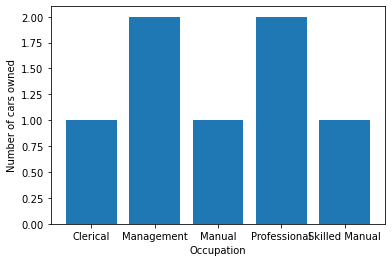

In [15]:
counts = AW_data.groupby(["Occupation"], as_index = False)['NumberCarsOwned'].median()
print(counts)
temp = np.array([counts['Occupation'],counts['NumberCarsOwned']])
plt.bar(temp[0], temp[1])
plt.xlabel('Occupation')
plt.ylabel('Number of cars owned')
plt.show()



As we would expect, Management and Professional workers own more number of cars on an average as compared to Clerical, Manual Occupation and Skilled Manual workers.

In [53]:
AW_data.NumberCarsOwned.unique()

array([0, 1, 4, 2, 3], dtype=int64)

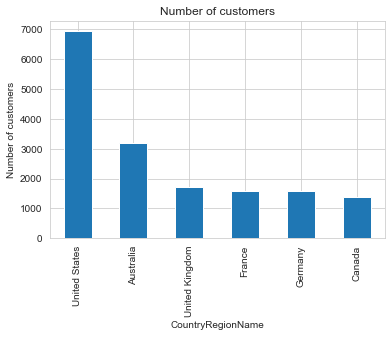

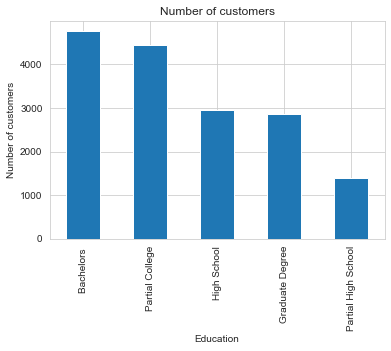

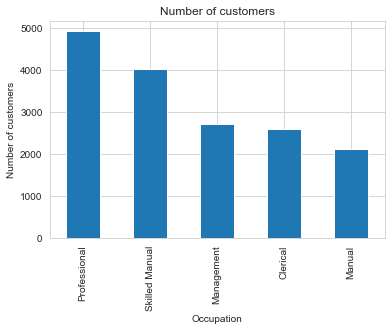

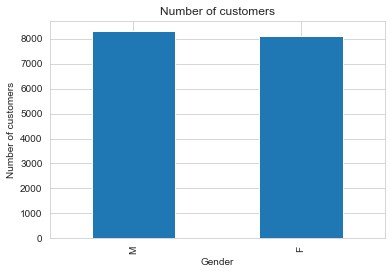

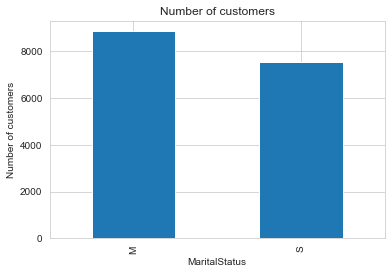

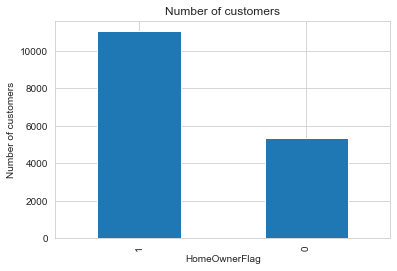

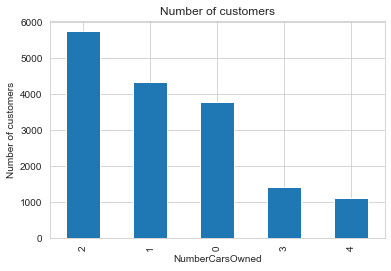

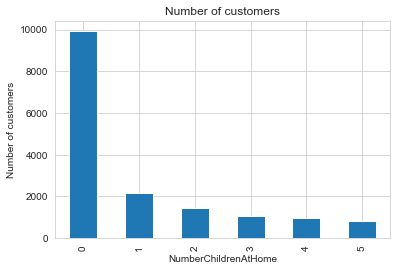

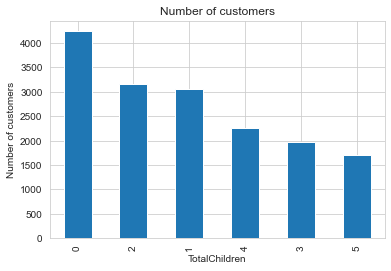

In [82]:
def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure() 
        ax = fig.gca() 
        counts = data[col].value_counts() 
        counts.plot.bar(ax = ax)
        plt.title("Number of customers")
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()
plot_bars(AW_data, cat_cols)

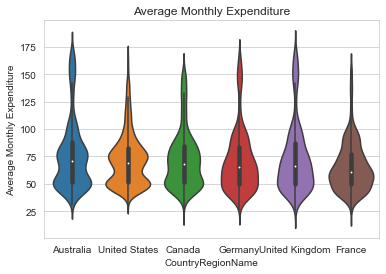

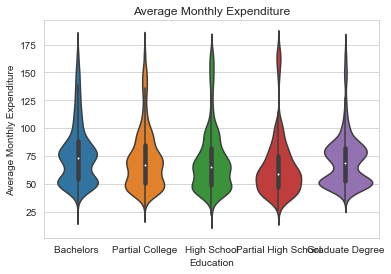

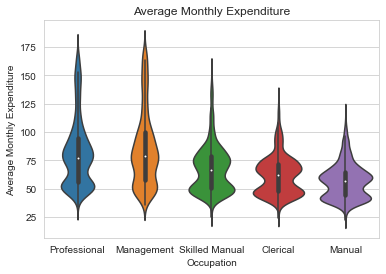

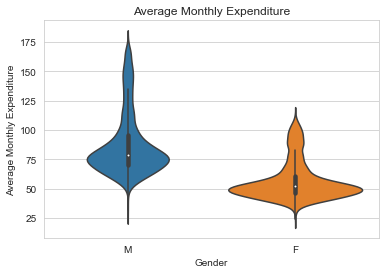

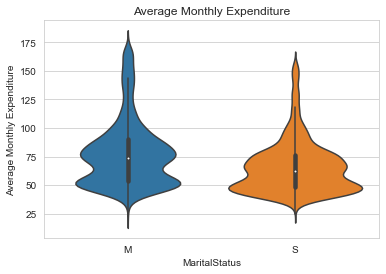

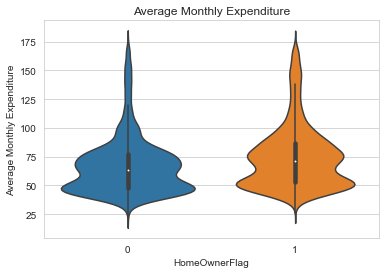

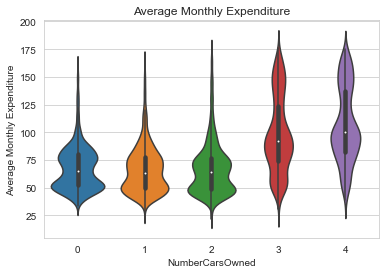

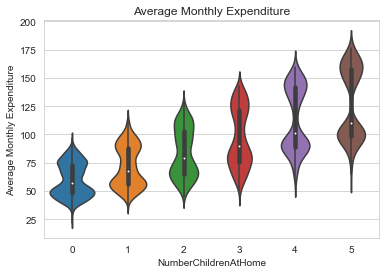

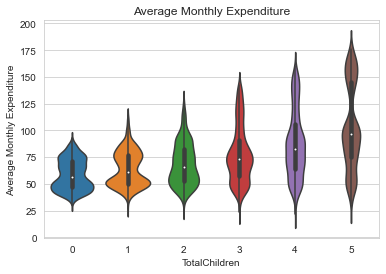

In [84]:

def plot_violin(data, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.violinplot(x = col, y = col_y, data=data)
        plt.ylabel("Average Monthly Expenditure")
        plt.title("Average Monthly Expenditure")
        plt.show()
plot_violin(AW_data, cat_cols)

In [72]:
imp_cols=['YearlyIncome', 'AveMonthSpend' ]

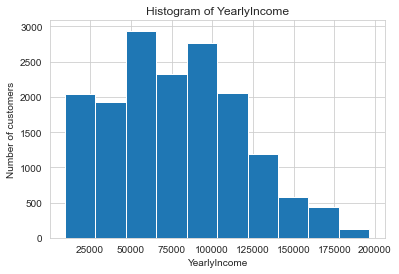

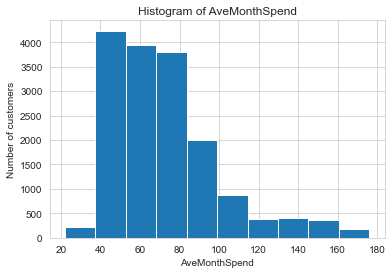

In [85]:
def plot_histogram(data, cols, bins = 10):
    for col in cols:
        fig = plt.figure()
        ax = fig.gca()
        data[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of customers')# Set text for y axis
        plt.show()
plot_histogram(AW_data, imp_cols)

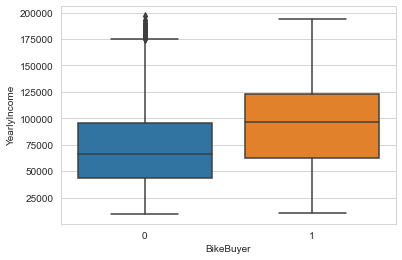

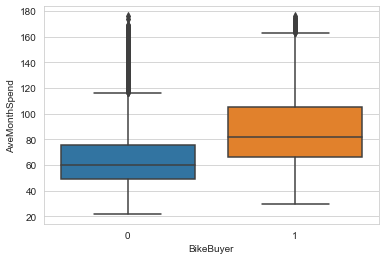

In [79]:
def plot_box(data, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(x=col_x, y=col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_box(AW_data, imp_cols)